# Preparing the dataset

In [1]:
from tensorflow.keras.layers import Flatten, Dense, Input, Lambda, Conv2D, MaxPooling2D
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, img_to_array
import tensorflow as tf

import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt 

# IN NEXT CELL WE HAVE TO CHANGE THE DATASET PATH ACCORDINGLY

In [2]:
IMAGE_SIZE = [150,150]
train_path = 'C:\\Users\\0MEN\\Desktop\\sub\\resizedto224\\Train\\'
valid_path = 'C:\\Users\\0MEN\\Desktop\\sub\\resizedto224\\Test\\'

In [3]:
resent_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE + [3])

In [4]:
for layer in resent_model.layers:
    layer.trainable = False

In [5]:
resent_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In next cell we have to change the value in Dense according to number of classes

In [6]:
x = Conv2D(128, (3, 3), activation='relu')(resent_model.output)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
#change the dense value according to number of classes
x = Dense(7,activation='softmax')(x)

model = Model(inputs=resent_model.input, outputs=x)

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 77, 77, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [9]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)


In [10]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (150,150),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 1919 images belonging to 7 classes.


In [11]:
testing_set = test_datagen.flow_from_directory(valid_path,
                                               target_size = (150,150),
                                               batch_size = 128,
                                               class_mode = 'categorical')

Found 99 images belonging to 7 classes.


In [12]:
hist = model.fit(training_set,
                validation_data = testing_set,
                epochs = 5,
                steps_per_epoch=len(training_set),
                validation_steps=len(testing_set))

Epoch 1/5
15/15 [==============================] - 179s 9s/step - loss: 4.1911 - accuracy: 0.2663 - val_loss: 3.2027 - val_accuracy: 0.2929
Epoch 2/5
15/15 [==============================] - 46s 3s/step - loss: 1.7017 - accuracy: 0.3981 - val_loss: 2.1606 - val_accuracy: 0.3636
Epoch 3/5
15/15 [==============================] - 46s 3s/step - loss: 1.4052 - accuracy: 0.4742 - val_loss: 1.8675 - val_accuracy: 0.4545
Epoch 4/5
15/15 [==============================] - 46s 3s/step - loss: 1.2390 - accuracy: 0.5487 - val_loss: 1.7051 - val_accuracy: 0.4343
Epoch 5/5
15/15 [==============================] - 46s 3s/step - loss: 1.1984 - accuracy: 0.5680 - val_loss: 1.5009 - val_accuracy: 0.4848


In [13]:
model.evaluate(testing_set)

1/1 [==============================] - 2s 2s/step - loss: 1.5009 - accuracy: 0.4848


[1.5008820295333862, 0.4848484992980957]

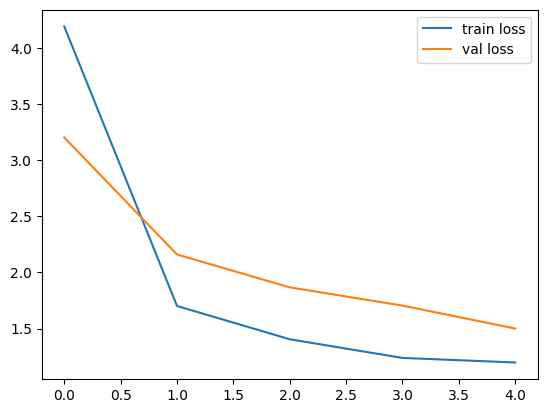

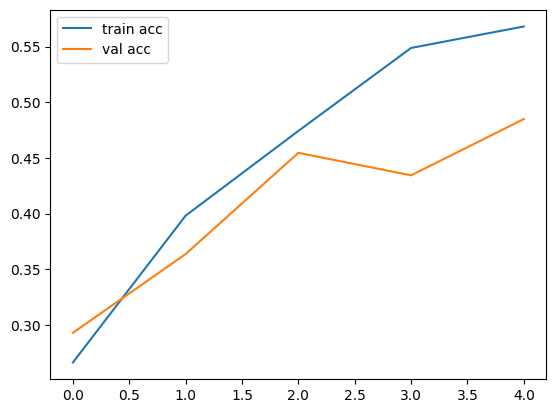

<Figure size 640x480 with 0 Axes>

In [14]:

# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
model.save('C:\\Users\\0MEN\\Desktop\\sub\\resnet50\\intel_resnet_dec24.h5')

C:\Users\0MEN\AppData\Local\anaconda\envs\tf_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
